# Проверка гипотез для увеличения выручки интернет-магазина

Вместе с отделом маркетинга был подготовлен список гипотез для увеличения выручки.
Задачи: 
- приоритизировать гипотезы;
- провести A/B-тест.

Описание данных

Данные для первой части

Файл /datasets/hypothesis.csv.

    Hypothesis — краткое описание гипотезы;
    Reach — охват пользователей по 10-балльной шкале;
    Impact — влияние на пользователей по 10-балльной шкале;
    Confidence — уверенность в гипотезе по 10-балльной шкале;
    Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части

Файл /datasets/orders.csv.

    transactionId — идентификатор заказа;
    visitorId — идентификатор пользователя, совершившего заказ;
    date — дата, когда был совершён заказ;
    revenue — выручка заказа;
    group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv.

    date — дата;
    group — группа A/B-теста;
    visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import datetime as dt
import scipy.stats as stats

In [2]:
# чтение файлов
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
def first_look(df):
    '''Функция для просмотра основной информации о таблице'''
    print('Первые 5 строк таблицы:')
    display(df.head())
    print('Информация о таблице:')
    print(df.info())
    display(df.describe())
    print('Количество строк и столбцов:')
    print(df.shape)
    print('Количество пропусков:')
    if df.isna().sum().sum()==0:
        print('пропусков нет')
    else:
        print(df.isna().sum())
    print('Количество дубликатов:')
    if df.duplicated().sum()==0:
        print('дубликатов нет')
    else:
        print(df.duplicated().sum())

## Приоритизация гипотез
Просмотрим таблицу с гипотезами.

In [4]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [5]:
# приведем названия столбцов к нижнему регистру
hypothesis.columns = [x.lower() for x in hypothesis.columns]
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [6]:
# применим фреймворк ICE для приоритизации гипотез
hypothesis['ICE'] = hypothesis.impact * hypothesis.confidence / hypothesis.efforts
# отсортируем гипотезы по убыванию приоритета
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).style.format("{:.1f}", subset='ICE')   

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


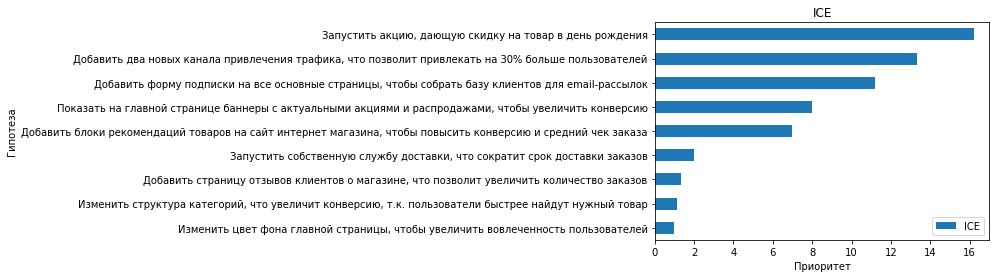

In [7]:
# построим график
ax = hypothesis[['hypothesis', 'ICE']].set_index('hypothesis').sort_values('ICE').plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('ICE')
plt.show()

In [8]:
# применим фреймворк ICE для приоритизации гипотез
hypothesis['RICE'] = hypothesis.reach * hypothesis.impact * hypothesis.confidence / hypothesis.efforts
# отсортируем гипотезы по убыванию приоритета
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False).style.format("{:.0f}", subset='RICE')

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40
8,"Запустить акцию, дающую скидку на товар в день рождения",16
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3


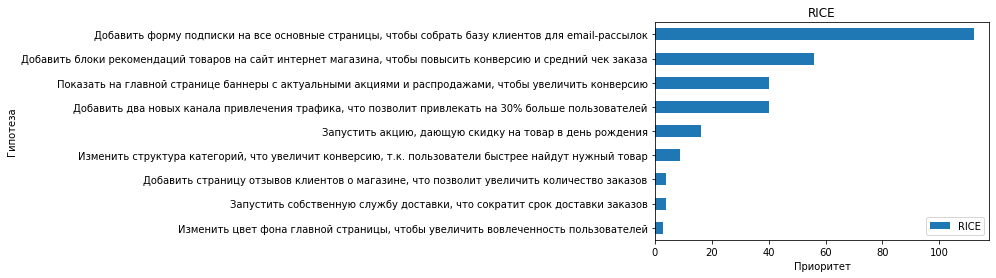

In [9]:
# построим график
ax = hypothesis[['hypothesis', 'RICE']].set_index('hypothesis').sort_values('RICE').plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('RICE')
plt.show()

**Вывод:** 

Наиболее приоритетные гипотезы по ICE:
1. Запустить акцию, дающую скидку на товар в день рождения
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
4. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
5. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа

Наиболее приоритетные гипотезы по RICE:
1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
4. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
5. Запустить акцию, дающую скидку на товар в день рождения

Пять наиболее важных для проверки гипотез совпадают у ICE и RICE, однако порядок отличается. 

Так, имевшая наибольший по ICE приоритет гипотеза "Запустить акцию, дающую скидку на товар в день рождения" опустилась аж на пятое место в RICE, так как имеет наименьший охват - лишь 1 балл. Вполне логично, ведь, как мы знаем, день рождения только раз в году, потому пользоваться этой акцией можно будет редко.

А вот гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" поднялась с третьего места по ICE на первое место по RICE, так как захватывает всех пользователей.

Схожая ситуация с гипотезой "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа", которая поднялась с пятого места на второе - она также охватывает большую часть клиентов.

## Анализ А/В-теста

In [10]:
# чтение файлов с данными
orders = pd.read_csv('/datasets/orders.csv')

In [11]:
# просмотр информации о таблице
first_look(orders)

Первые 5 строк таблицы:


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


Количество строк и столбцов:
(1197, 5)
Количество пропусков:
пропусков нет
Количество дубликатов:
дубликатов нет


In [12]:
# чтение файлов с данными
visitors = pd.read_csv('/datasets/visitors.csv')

In [13]:
# просмотр информации о таблице
first_look(visitors)

Первые 5 строк таблицы:


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


Количество строк и столбцов:
(62, 3)
Количество пропусков:
пропусков нет
Количество дубликатов:
дубликатов нет


In [14]:
# переименуем столбцы
orders.rename(columns={'transactionId':'transaction_id', 'visitorId':'visitor_id'}, inplace=True)

In [15]:
# преобразование из строки в дату
def to_date(x):
    x['date'] = pd.to_datetime(x['date'])

to_date(orders)
to_date(visitors)

In [16]:
# просмотрим минимальную и максимальную даты
print(orders.date.min().date())
print(orders.date.max().date())
print(visitors.date.min().date())
print(visitors.date.max().date())

2019-08-01
2019-08-31
2019-08-01
2019-08-31


In [17]:
# общее количество заказов в двух группах
orders.groupby('group').agg({'transaction_id' : 'count'})

,transaction_id
group,
A,557
B,640


In [18]:
# общее количество уникальных пользователей в двух группах
orders.groupby('group').agg({'visitor_id' : 'nunique'})

,visitor_id
group,
A,503
B,586


In [19]:
# проверим, есть ли пользователи, которые попали в обе группы
visitors_in_both_groups = orders.groupby(['visitor_id'])\
    .agg({'group': 'nunique'})\
    .query('group > 1')\
    .index.to_list()
print(len(visitors_in_both_groups))

58


In [20]:
# найдем долю пользователей, которые попали в обе группы
len(visitors_in_both_groups)/orders['visitor_id'].nunique()

0.05625606207565471

Таких пользователей 5,6%, потому удалим их.

In [21]:
# удалим этих пользователей
orders = orders.drop(orders[orders['visitor_id'].isin(visitors_in_both_groups)].index).reset_index()

In [22]:
orders

,index,transaction_id,visitor_id,date,revenue,group
0,0,3667963787,3312258926,2019-08-15,1650,B
1,1,2804400009,3642806036,2019-08-15,730,B
2,3,3797467345,1196621759,2019-08-15,9759,B
3,4,2282983706,2322279887,2019-08-15,2308,B
4,5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...,...
1011,1191,3592955527,608641596,2019-08-14,16490,B
1012,1192,2662137336,3733762160,2019-08-14,6490,B
1013,1193,2203539145,370388673,2019-08-14,3190,A
1014,1194,1807773912,573423106,2019-08-14,10550,A


In [23]:
# проверим, что попавших в обе группы пользователей не осталось
visitors_in_both_groups = orders.groupby(['visitor_id'])\
    .agg({'group': 'nunique'})\
    .query('group > 1')\
    .index.to_list()
print(len(visitors_in_both_groups))

0


**Вывод**

В таблице orders минимальная выручка заказа составил 50 ед., максимальная - 1 294 500 ед. Средняя выручка - 8 348,01 ед., медиана - 2 978 ед.

В таблице visitors количество пользователей за день в группе A/B-теста варьировалось от 361 до 770. Среднее число - 607,29, медиана - 624,5.

Минимальная и максимальная дата в двух таблицах совпадает - 1 августа 2019 г. и 31 августа 2019 г. соответственно.

Дубликатов в таблицах нет.

Общее количество заказов в группах не совпадает. В группе А зафиксировано 557 заказов, в группе В - 640. Количество уникальных пользователей также не совпадает. В группе А - 503 пользователя, в группе В - 586. Кроме того, в группе А и группе В оказалось 58 пользователей одновременно. Эти пользователи были удалены.

### График кумулятивной выручки по группам

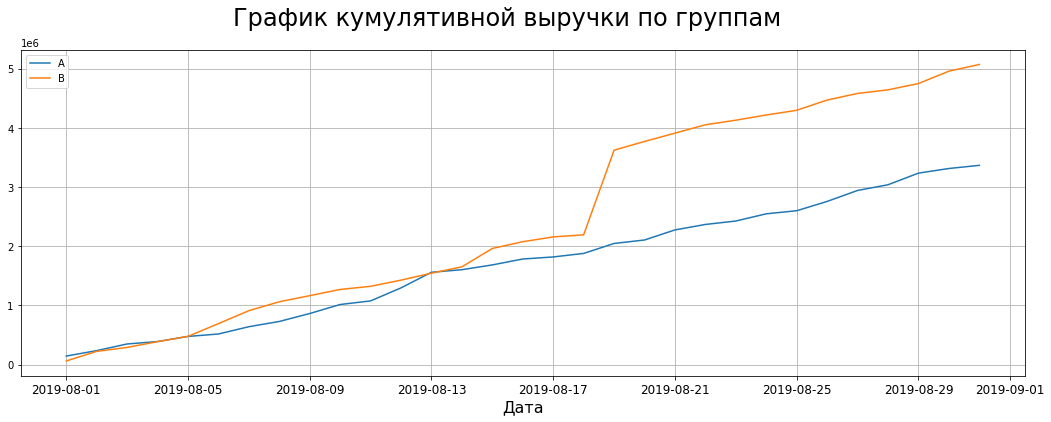

In [24]:
# создание датафрейма datesGroups с уникальными парами значений 'date' и 'group', таблицы orders; удаление дубликатов
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeData['conversion'] = (
    cumulativeData['orders'] / cumulativeData['visitors']
)

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize = (18, 6)).suptitle('График кумулятивной выручки по группам', fontsize=24)
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.tick_params(axis='x', labelsize=12)
plt.xlabel('Дата', fontsize=16)
plt.grid()
plt.legend()
plt.show()

Группа В с минимальным отрывом лидировала практически весь тест. Но с 18 августа выручка у группы В резко подскочила вверх. Выручка группы А росла практически равномерно весь месяц.

### График кумулятивного среднего чека по группам

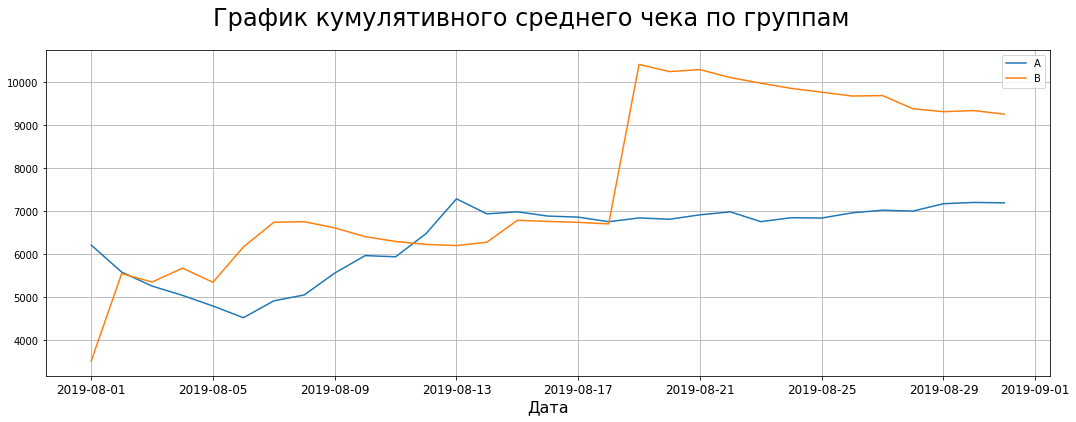

In [25]:
plt.figure(figsize = (18, 6)).suptitle('График кумулятивного среднего чека по группам', fontsize=24)

# график среднего чека группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

# график среднего чека группы В
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.tick_params(axis='x', labelsize=12)
plt.xlabel('Дата', fontsize=16)
plt.grid()
plt.legend()
plt.show()

Кумулятивное значение среднего чека к середине месяца выросло в обоих группах, однако затем немного снизилось. Очень интересно, что 18-19 августа в группе В было резкое повышение среднего чека - скорее всего, имели место какие-то очень крупные заказы.

### График относительного изменения кумулятивного среднего чека группы B к группе A

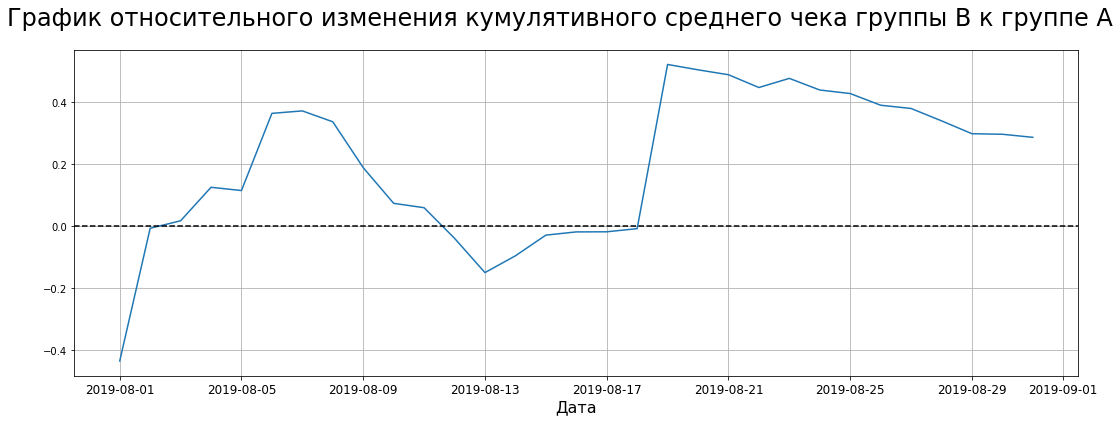

In [26]:
mergedCumulativeRevenue  = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                    left_on='date', 
                                                    right_on='date', 
                                                    how='left', 
                                                    suffixes=['A', 'B'])

plt.figure(figsize = (18, 6))\
            .suptitle('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize=24)

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], 
        (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1);

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

# размер шрифта по оси x
plt.tick_params(axis='x', labelsize=12)
plt.xlabel('Дата', fontsize=16)
plt.grid()

Видно резкий скачок вниз 8 августа и резкий скачок вверх 18 августа (как раз в то время, когда было повышение среднего чека).

### График кумулятивной конверсии по группам

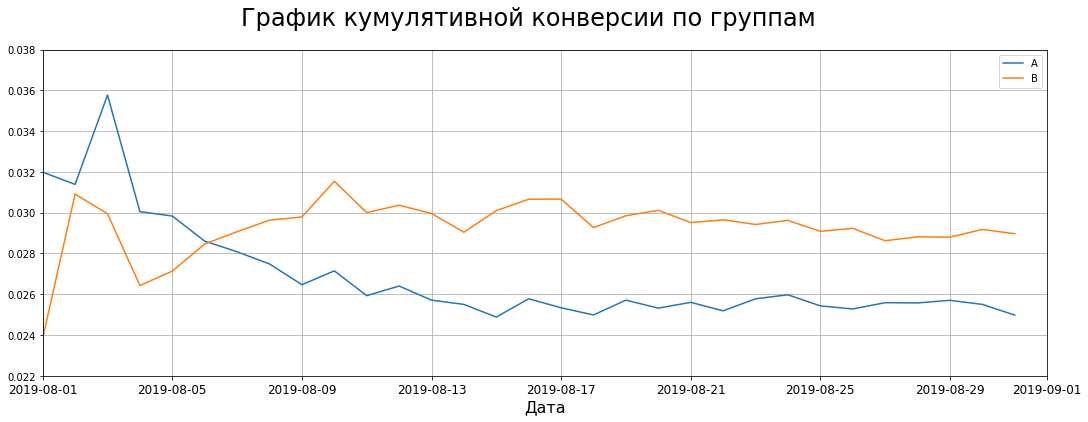

In [27]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize = (18, 6))\
            .suptitle('График кумулятивной конверсии по группам', fontsize=24)

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.tick_params(axis='x', labelsize=12)
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.022, 0.038])
plt.xlabel('Дата', fontsize=16)
plt.grid()
plt.legend()
plt.show()

В начале видно колебания конверсии, однако уже к 11 августа конверсия у обеих групп стабилизировалась и оставлась примерно одинаковой до конца теста. В целом, конверсия группы В выше, чем конверсия группы А.

### График относительного изменения кумулятивной конверсии группы B к группе A'

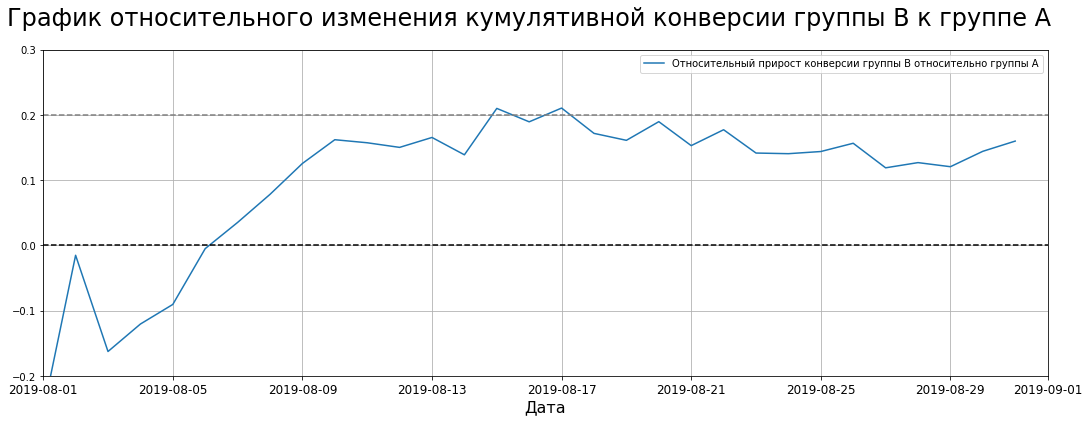

In [28]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                                           left_on='date', 
                                                                           right_on='date', 
                                                                           how='left', 
                                                                           suffixes=['A', 'B'])
plt.figure(figsize = (18, 6))\
            .suptitle('График относительного изменения кумулятивной конверсии группы B к группе A', fontsize=24)

plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.2, 0.3])

plt.tick_params(axis='x', labelsize=12)
plt.grid()
plt.xlabel('Дата', fontsize=16)
plt.show()

В начале теста группа В проигрывала группе А, но с 6 августа уверенно вырвалась вперед.

### Точечный график количества заказов по пользователям

      visitorId  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


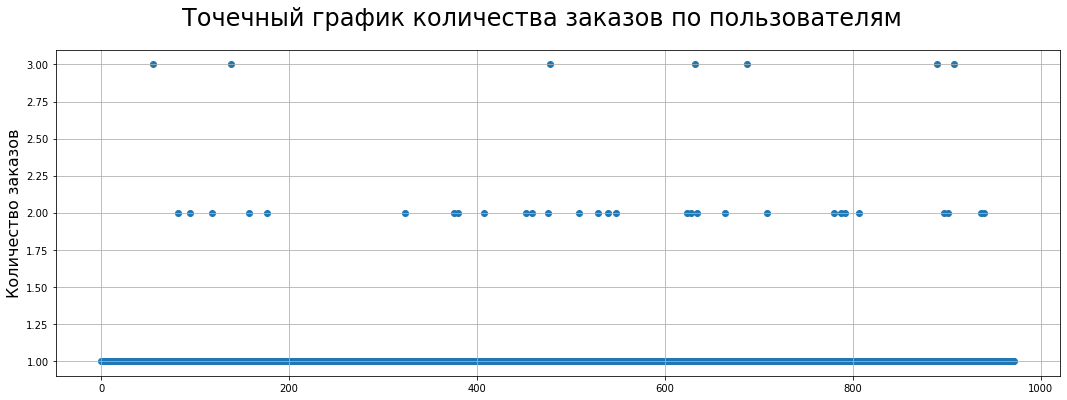

In [29]:
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users.columns = ['visitorId', 'orders']

print(orders_by_users.sort_values(by='orders', ascending=False).head(10))

x_values = pd.Series(range(0, len(orders_by_users)))

plt.figure(figsize = (18, 6))\
            .suptitle('Точечный график количества заказов по пользователям', fontsize=24)
plt.scatter(x_values, orders_by_users['orders']);
plt.grid()
plt.ylabel('Количество заказов', fontsize=16)
plt.show()

Пользователей, которые сделали более двух заказов, крайне мало. Однако, есть некоторое количество пользователей, которые сделали два заказа. Посчитать выборочные перцентили, чтобы оценить, насколько много таких пользователей и можно ли их считать аномалиями.

In [30]:
print(np.percentile(orders_by_users['orders'], [95, 99]))

[1. 2.]


Не более 5% пользователей совершали больше одного заказа. И не более 1% пользователей - больше 2 заказов.

,index,transaction_id,visitor_id,date,revenue,group
365,425,590470918,1920142716,2019-08-19,1294500,B
1015,1196,3936777065,2108080724,2019-08-15,202740,B
971,1136,666610489,1307669133,2019-08-13,92550,A
632,744,3668308183,888512513,2019-08-27,86620,B
631,743,3603576309,4133034833,2019-08-09,67990,A
939,1103,1348774318,1164614297,2019-08-12,66350,A
937,1099,316924019,148427295,2019-08-12,65710,A
811,949,1347999392,887908475,2019-08-21,60450,A
802,940,2420050534,4003628586,2019-08-08,58550,B
109,131,3163614039,2254586615,2019-08-22,53904,A


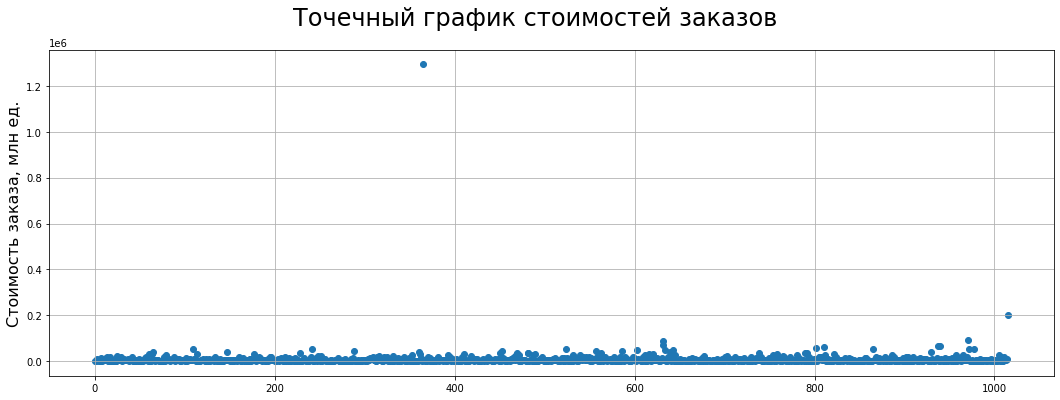

In [31]:
display(orders.sort_values(by='revenue', ascending=False).head(10))

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize = (18, 6))\
            .suptitle('Точечный график стоимостей заказов', fontsize=24)
plt.scatter(x_values, orders['revenue']);
plt.grid()
plt.ylabel('Стоимость заказа, млн ед.', fontsize=16)
plt.show()

На графике виден самый крупный заказ на сумму 1 294 500. Также виден заказ в размере 202 740. Все остальные заказы ниже 100 000.

In [32]:
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


Не более, чем у 5% пользователей чек дороже 26785. Не больше, чем у 1% - дороже 53 904. 

### Расчет статистической значимости различий в конверсии между группами по «сырым» данным.

Н0: различий в конверсии между группами нет.

Н1: различия в конверсии между группами есть.

In [33]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

# для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['user_id', 'orders'] 

# пользователям с заказами будет соответствовать число заказов пользователя, а пользователям без заказов — нули
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("P-value = {0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Прирост конверсии равен {0:.1%}".format(sampleB.mean() / sampleA.mean() - 1))

P-value = 0.01102
Прирост конверсии равен 16.0%


P-value = 0.01102, что меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный прирост конверсии группы В к конверсии группы А равен 16%.

### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.

Н0: различий в среднем чеке между группами нет.

Н1: различия в среднем чеке между группами есть.

In [34]:
print("P-value = {0:.5f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                          orders[orders['group']=='B']['revenue'])[1]))
print("Прирост конверсии равен {0:.1%}".format(orders[orders['group']=='B']['revenue']
                       .mean()/orders[orders['group']=='A']['revenue']
                       .mean()-1)) 

P-value = 0.82949
Прирост конверсии равен 28.7%


P-value гораздо больше 0.05, следовательно, значимых отличий в среднем чеке между группами нет. Наблюдаемое различие среднего чека в 28,7% не является статистически значимым.

### Расчет статистической значимости различий в конверсии между группами по «очищенным» данным.

In [35]:
# срезы пользователей
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['user_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['user_id'],
    ],
    axis=0,
)

# срезы пользователей
revenue_lim = np.percentile(orders['revenue'], 95)
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_lim]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values())

In [36]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("P-value = {0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Прирост конверсии равен {0:.1%}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P-value = 0.01235
Прирост конверсии равен 18.2%


За аномальных пользователей были приняты те, кто совершил 3 заказа и более, или совершил заказ на сумму свыше 26 785 ед. Как и в случае с "сырыми" данными, p-value не превысил 0,05, а значит, нулевую гипотезу отвергаем. Группа В оказалась лучше по конверсии на 18,2%, еще лучше, чем до "очистки" данных.

### Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.

In [37]:
print(
    "P-value = {0:.5f}".format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Прирост конверсии равен {0:.1%}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value = 0.64590
Прирост конверсии равен -4.8%


P-value несколько снилизился по сравнению с "сырыми" данными и стал равен 0.646, но нулевую гипотезу мы все равно не можем отвергнуть. А вот средний чек у сегмента В снизился настолько, что сегмент А стал превосходить В, но всего лишь на 4,8%. После "очистки" данных разница в среднем чеке между двумя группами сократилась до минимума, наблюдаемое различие не является статистически значимым.

# Выводы

- График различия конверсии между группами сообщает, что результаты группы B лучше группы A.
- График различия среднего чека сильно колеблется, что свидетельствует о наличии аномалиий.
- Конверсия группы В значительно выше конверсии группы А, причем как по "сырым" данным, так и по "очищенным".
- Разница в среднем чеке не была обнаружена.

Исходя из проведенного анализа, тест следует остановить и зафиксировать победу группы В, результаты по конверсии которой оказались лучше группы А на 16% и 18,2% до и после "очистки" данных соответственно.